# 📈 Prediksi Harga Mobil: Bagging vs Boosting

Notebook ini membandingkan dua pendekatan machine learning untuk regresi:
- **Random Forest (Bagging)**
- **Gradient Boosting (Boosting)**

## 📏 Evaluasi Model
Model dievaluasi menggunakan metrik:
- **MSE**: Mean Squared Error
- **RMSE**: Root Mean Squared Error
- **R²**: Koefisien Determinasi

## 🔢 Rumus Evaluasi

- **MSE** = $ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
- **RMSE** = $ \sqrt{\text{MSE}} $
- **R²** = $ 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $

### Keterangan:
- $y_i$ : nilai aktual  
- $\hat{y}_i$ : nilai prediksi  
- $\bar{y}$ : rata-rata dari nilai aktual  
- $n$ : jumlah data


## ✅ Kesimpulan
Model **Gradient Boosting**:
- Memiliki **MSE dan RMSE lebih rendah** → kesalahan lebih kecil
- Memiliki **R² lebih tinggi** → menjelaskan lebih banyak variasi harga mobil

> Dengan demikian, **Gradient Boosting Regressor adalah model terbaik** untuk memprediksi harga mobil.


/tmp/ipython-input-5-1421937771.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-5-1421937771.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

=== 📊 Hasil Evaluasi Model Regressi Harga Mobil ===

🔹 Random Forest Regressor (Bagging)
---------------------------------------------
Mean Squared Error (MSE)  : 7,543,843.35
Root Mean Squared Error   : 2,746.61
Koefisien Determinasi R²  : 0.9383

🔸 Gradient Boosting Regressor (Boosting)
----------------------------------------------
Mean Squared Error (MSE)  : 5,968,222.37
Root Mean Squared Error   : 2,442.99
Koefisien Determinasi R²  : 0.9512

✅ Kesimpulan:
Model Gradient Boosting menunjukkan performa terbaik:
- Memiliki nilai MSE dan RMSE yang lebih rendah → prediksi lebih presisi
- Memiliki nilai R² yang lebih tinggi (0.9512) → lebih mampu menjelaskan variasi data

👉 Maka, **Gradient Boosting Regressor** adalah model terbaik untuk kasus ini.


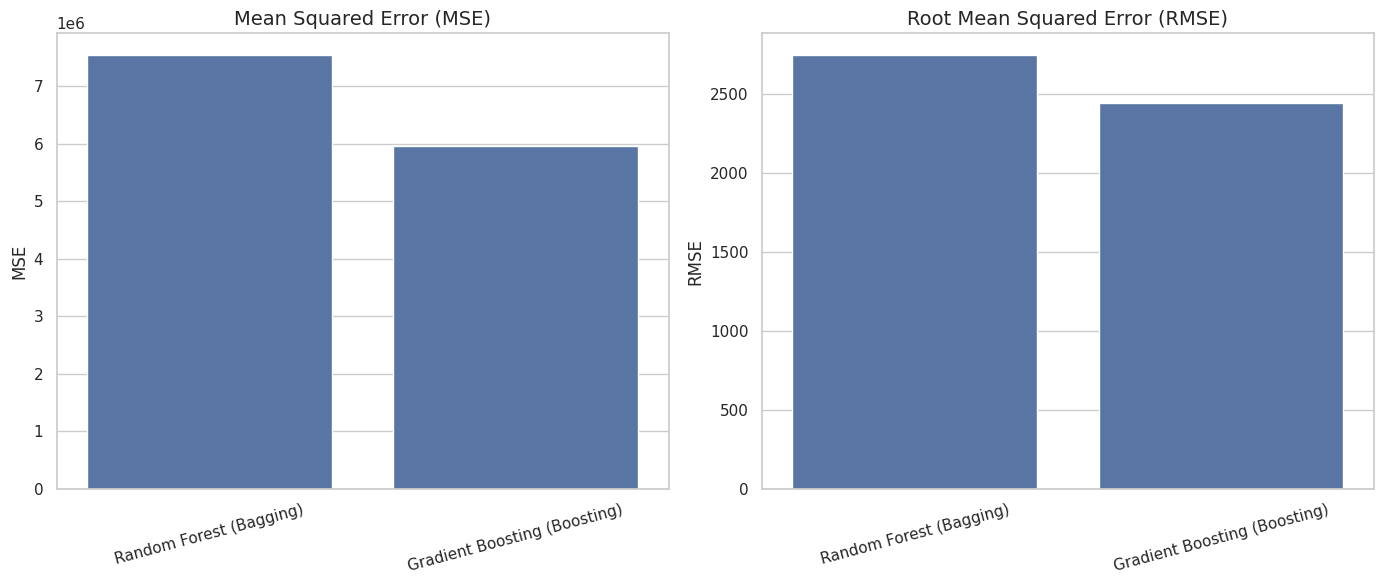

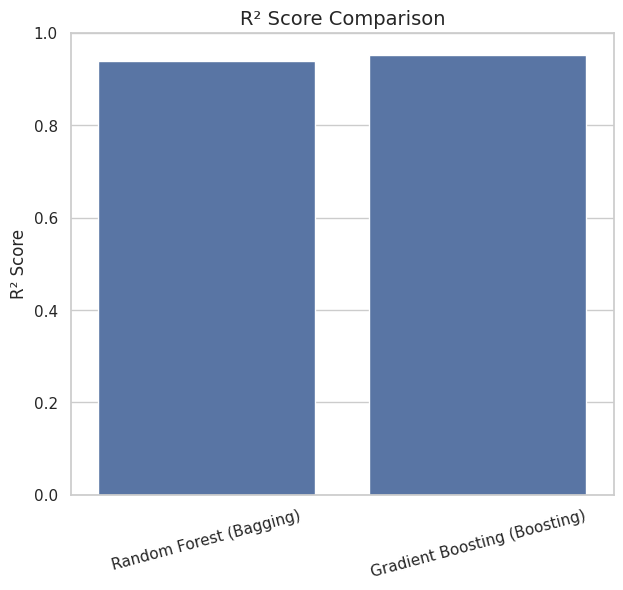

In [5]:
# ==========================================
# 🚗 Prediksi Harga Mobil: Bagging vs Boosting
# ==========================================

# 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 2. Load Dataset dari URL
df = pd.read_csv('Automobile.csv')

# 3. Preprocessing
df = df.dropna(subset=['price'])  # Hapus baris dengan target kosong

# Isi nilai kosong numerik dengan median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Label Encoding fitur kategorikal
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna("missing", inplace=True)
    df[col] = LabelEncoder().fit_transform(df[col])

# 4. Split Fitur dan Target
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Inisialisasi dan Latih Model
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# 6. Prediksi
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# 7. Evaluasi Model
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

rf_mse, rf_rmse, rf_r2 = regression_metrics(y_test, rf_pred)
gb_mse, gb_rmse, gb_r2 = regression_metrics(y_test, gb_pred)

# 8. Tampilkan Hasil Evaluasi
print("=== 📊 Hasil Evaluasi Model Regressi Harga Mobil ===\n")

print("🔹 Random Forest Regressor (Bagging)")
print("-" * 45)
print(f"Mean Squared Error (MSE)  : {rf_mse:,.2f}")
print(f"Root Mean Squared Error   : {rf_rmse:,.2f}")
print(f"Koefisien Determinasi R²  : {rf_r2:.4f}\n")

print("🔸 Gradient Boosting Regressor (Boosting)")
print("-" * 46)
print(f"Mean Squared Error (MSE)  : {gb_mse:,.2f}")
print(f"Root Mean Squared Error   : {gb_rmse:,.2f}")
print(f"Koefisien Determinasi R²  : {gb_r2:.4f}\n")

print("✅ Kesimpulan:")
print("Model Gradient Boosting menunjukkan performa terbaik:")
print("- Memiliki nilai MSE dan RMSE yang lebih rendah → prediksi lebih presisi")
print(f"- Memiliki nilai R² yang lebih tinggi ({gb_r2:.4f}) → lebih mampu menjelaskan variasi data")
print("\n👉 Maka, **Gradient Boosting Regressor** adalah model terbaik untuk kasus ini.")

# 9. Visualisasi Perbandingan Metrik
metrics_df = pd.DataFrame({
    'Model': ['Random Forest (Bagging)', 'Gradient Boosting (Boosting)'],
    'MSE': [rf_mse, gb_mse],
    'RMSE': [rf_rmse, gb_rmse],
    'R²': [rf_r2, gb_r2]
})

sns.set(style="whitegrid")

# Grafik MSE dan RMSE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Model', y='MSE', data=metrics_df, ax=ax[0])
ax[0].set_title("Mean Squared Error (MSE)", fontsize=14)
ax[0].set_ylabel("MSE")
ax[0].set_xlabel("")
ax[0].tick_params(axis='x', rotation=15)

sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=ax[1])
ax[1].set_title("Root Mean Squared Error (RMSE)", fontsize=14)
ax[1].set_ylabel("RMSE")
ax[1].set_xlabel("")
ax[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Grafik R² Score
plt.figure(figsize=(7, 6))
sns.barplot(x='Model', y='R²', data=metrics_df)
plt.title("R² Score Comparison", fontsize=14)
plt.ylabel("R² Score")
plt.xlabel("")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()
